### 1. Возьмите датасет Mortality and Water Hardness
     
     
Дополнительно будет выложен в ЛК   
В этом датасете содержатся данные по средней годовой смертности на   
100000 населения и концентрации кальция в питьевой воде для 61   
большого города в Англии и Уэльсе. Города дополнительно поделены на   
северные и южные.  
   
   
### 2.  Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?   
   
   1. Построить точечный график   
   2. Рассчитать коэффициенты корреляции Пирсона и Спирмена   
   3. Построить модель линейной регрессии   
   4. Рассчитать коэффициент детерминации   
   5. Вывести график остатков   
   
### 3. Задание   
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?   
   
   1. Разделить данные на 2 группы   
   2. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности   

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('water.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

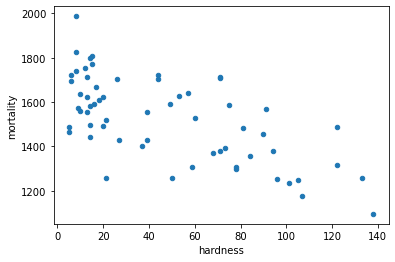

In [70]:
df.plot(kind='scatter', x='hardness', y='mortality') ### точечный график

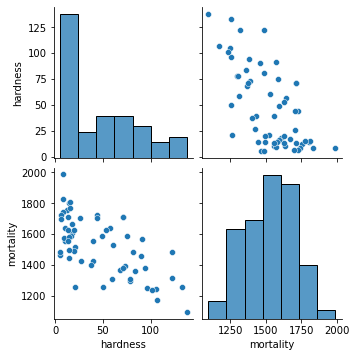

In [71]:
sns.pairplot(df[['hardness', 'mortality']])

In [23]:
df[['hardness', 'mortality']].corr() ### корреляция Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [24]:
df[['hardness', 'mortality']].corr(method='spearman') ### корреляция Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [26]:
from sklearn.linear_model import LinearRegression ### импорт регрессии
from sklearn.model_selection import train_test_split

In [43]:
X = df[['hardness']]
y = df['mortality']

In [33]:
X = df[['mortality']]
y = df['hardness']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [45]:
X_train.shape

(42, 1)

In [46]:
y_train.shape

(42,)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)  ### метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [48]:
model.coef_ ### коэффициент 'a'

array([-3.13167087])

In [49]:
model.intercept_ ### коэффициент 'b'

1668.9722977277095

In [50]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [52]:
res_df = X_test.copy()  ### сравним наши прогнозы с фактом

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


In [53]:
model.score(X_test, y_test) ### метод возвращает значение коэффициента детерминации

0.5046490611017092

Зависимость слабая, слишком мало данных для изучения

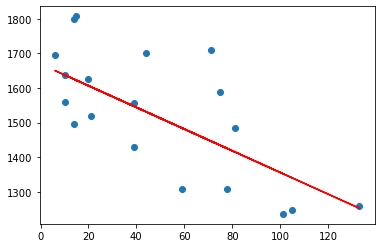

In [54]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

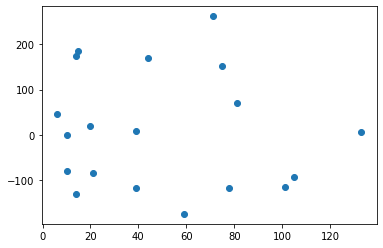

In [74]:
plt.scatter(X_test, (y_test - y_pred)) ### связи между остаткми не наблюдается

### Задание 3

In [81]:
df_north = df[df['location'] == 'North']
df_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [82]:
df_south = df[df['location'] == 'South']
df_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

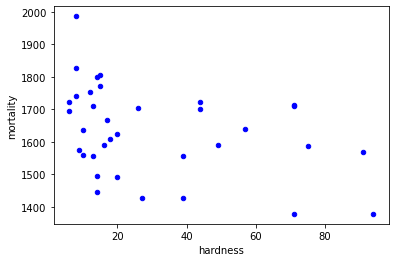

In [83]:
df_north[df_north.location == 'North'].plot(kind='scatter', x='hardness', y='mortality', c='blue')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

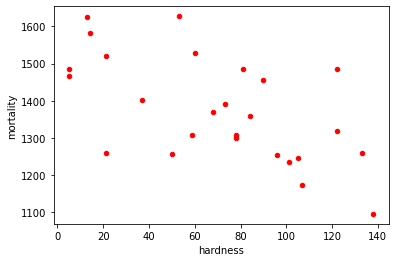

In [84]:
df_south[df_south.location == 'South'].plot(kind='scatter', x='hardness', y='mortality', c='red')

In [86]:
df_north[df_north.location == 'North'][['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [87]:
df_south[df_south.location == 'South'][['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [88]:
df_north[df_north.location == 'North'][['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [89]:
df_south[df_south.location == 'South'][['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


#### Построение модели

In [99]:
X_n = df_north[df_north.location == 'North'][['hardness']]
y_n = df_north[df_north.location == 'North']['mortality']

In [91]:
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X_n, y_n, test_size=0.3, random_state=42)

In [92]:
model_n = LinearRegression()
model_n.fit(X_n_train, y_n_train)

LinearRegression()

In [93]:
y_n_pred = model_n.predict(X_n_test)

In [94]:
model_n.score(X_n_test, y_n_test)

0.018885304285745863

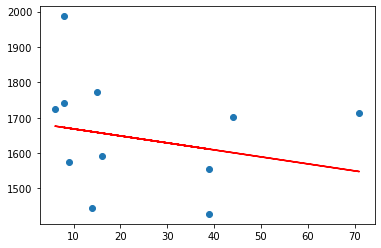

In [95]:
plt.scatter(X_n_test, y_n_test)
plt.plot(X_n_test, y_n_pred, c='r')

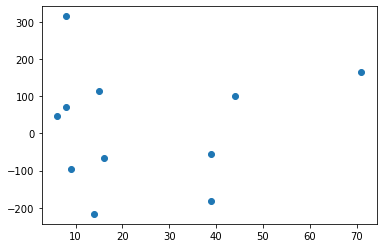

In [96]:
plt.scatter(X_n_test, (y_n_test - y_n_pred))

In [100]:
X_s = df_south[df_south.location == 'South'][['hardness']]
y_s = df_south[df_south.location == 'South']['mortality']

In [101]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.3, random_state=42)

In [102]:
model_s = LinearRegression()
model_s.fit(X_s_train, y_s_train)

LinearRegression()

In [103]:
y_s_pred = model_s.predict(X_s_test)

In [104]:
model_s.score(X_s_test, y_s_test)

-2.5519223012352077

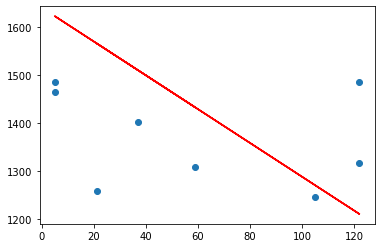

In [105]:
plt.scatter(X_s_test, y_s_test)
plt.plot(X_s_test, y_s_pred, c='r')

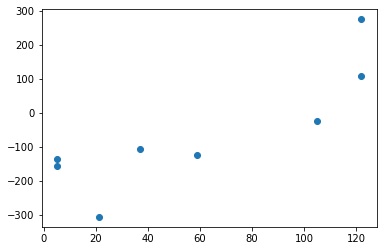

In [106]:
plt.scatter(X_s_test, (y_s_test - y_s_pred))